
## **Аналіз даних**
У даному розділі буде описано аналіз даними з певними статистичними підрахунками,графічними представленнями та підготовкою для використання у побудові нейронних мереж

# Завантаження бібліотек


In [ ]:
import pandas as pd
# For displaying images in ipython
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes = True)
%matplotlib inline

In [ ]:
print (pd.__version__,sns.__version__)

1.1.5 0.11.1


# Завантаження даних


In [ ]:
rawrecipes = pd.read_csv("/content/drive/MyDrive/archive/RAW_recipes.csv")
rawreviews = pd.read_csv("/content/drive/MyDrive/archive/RAW_interactions.csv")


In [ ]:
rawrecipes.head(5)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
rawreviews.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


# Об'єднюємо дані в один датасет для аналізу

In [ ]:
recipes=pd.merge(rawrecipes,rawreviews,left_on='id',right_on='recipe_id')

In [ ]:
recipes.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,31490,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...


In [ ]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   name            1132366 non-null  object
 1   id              1132367 non-null  int64 
 2   minutes         1132367 non-null  int64 
 3   contributor_id  1132367 non-null  int64 
 4   submitted       1132367 non-null  object
 5   tags            1132367 non-null  object
 6   nutrition       1132367 non-null  object
 7   n_steps         1132367 non-null  int64 
 8   steps           1132367 non-null  object
 9   description     1108857 non-null  object
 10  ingredients     1132367 non-null  object
 11  n_ingredients   1132367 non-null  int64 
 12  user_id         1132367 non-null  int64 
 13  recipe_id       1132367 non-null  int64 
 14  date            1132367 non-null  object
 15  rating          1132367 non-null  int64 
 16  review          1132198 non-null  object
dtypes: int64

In [ ]:
recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,user_id,recipe_id,rating
count,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06
mean,1.608972e+05,3.614684e+04,2.655967e+06,9.627970e+00,8.952028e+00,1.384291e+08,1.608972e+05,4.411016e+00
std,1.303987e+05,8.796494e+06,6.774670e+07,5.819689e+00,3.689908e+00,5.014269e+08,1.303987e+05,1.264752e+00
min,3.800000e+01,0.000000e+00,2.700000e+01,0.000000e+00,1.000000e+00,1.533000e+03,3.800000e+01,0.000000e+00
25%,5.425700e+04,2.000000e+01,3.744900e+04,6.000000e+00,6.000000e+00,1.354700e+05,5.425700e+04,4.000000e+00
50%,1.205470e+05,4.000000e+01,8.983100e+04,8.000000e+00,9.000000e+00,3.309370e+05,1.205470e+05,5.000000e+00
75%,2.438520e+05,7.000000e+01,2.427290e+05,1.200000e+01,1.100000e+01,8.045500e+05,2.438520e+05,5.000000e+00
max,5.377160e+05,2.147484e+09,2.002290e+09,1.450000e+02,4.300000e+01,2.002373e+09,5.377160e+05,5.000000e+00


# Аналіз на наявність null

In [ ]:
recipes.isnull()

NameError: ignored

Кількість пропущених значень

In [ ]:
recipes.isna().sum()

name                  1
id                    0
minutes               0
contributor_id        0
submitted             0
tags                  0
nutrition             0
n_steps               0
steps                 0
description       23510
ingredients           0
n_ingredients         0
user_id               0
recipe_id             0
date                  0
rating                0
review              169
dtype: int64

In [ ]:
len(recipes)

1132367

In [ ]:
recipes.shape

(1132367, 17)

# Аналіз для візуалізації даних

Кількість оцінок кожного типу(0-5)

In [ ]:
recipes['rating'].value_counts()

5    816364
4    187360
0     60847
3     40855
2     14123
1     12818
Name: rating, dtype: int64

In [ ]:
recipes['n_ingredients'].value_counts()

8     124033
7     123475
9     122669
10    111804
6     109187
11     92908
5      90649
12     71253
4      61908
13     55319
14     37561
3      34388
15     27132
16     20825
17     12195
2      11709
18      7726
20      5243
19      5043
21      2122
22      1845
23      1101
24       616
27       433
26       286
25       279
1        177
29       153
28        83
30        74
31        55
34        24
43        22
32        19
35        16
38        14
40        11
33         4
39         3
37         2
36         1
Name: n_ingredients, dtype: int64

# А

In [ ]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   name            1132366 non-null  object
 1   id              1132367 non-null  int64 
 2   minutes         1132367 non-null  int64 
 3   contributor_id  1132367 non-null  int64 
 4   submitted       1132367 non-null  object
 5   tags            1132367 non-null  object
 6   nutrition       1132367 non-null  object
 7   n_steps         1132367 non-null  int64 
 8   steps           1132367 non-null  object
 9   description     1108857 non-null  object
 10  ingredients     1132367 non-null  object
 11  n_ingredients   1132367 non-null  int64 
 12  user_id         1132367 non-null  int64 
 13  recipe_id       1132367 non-null  int64 
 14  date            1132367 non-null  object
 15  rating          1132367 non-null  int64 
 16  review          1132198 non-null  object
dtypes: int64

# Найпопулярніші рецепти у датасеті

In [ ]:
gb_interactions = rawreviews.groupby('recipe_id')['rating']
df_rating = pd.concat([gb_interactions.count(),gb_interactions.mean(),gb_interactions.std()],axis=1)
df_rating.columns = ['Quantity','Rating','Stdev']
df_rating = df_rating.sort_values(by=['Rating','Quantity'],ascending=[False,False])



In [ ]:
df_rating

,Quantity,Rating,Stdev
recipe_id,,,
55309,52,5.0,0.0
24768,37,5.0,0.0
121941,36,5.0,0.0
166669,36,5.0,0.0
62754,32,5.0,0.0
...,...,...,...
537323,1,0.0,NaN
537351,1,0.0,NaN
537429,1,0.0,NaN


Написати-
1)Найпопулярніші рецепти у датасеті
2)Найпопулярніші інгрідієнти у рецептах
3)Кількість рейтингу для кожного рецепту
4)Кореляційну матрицю та основні характеристики по кореляції
5)Графіки по калорійності,основних кроках, відгуки і рейтинги.

# Найпопулярніші слова у відгуках у рецептах у датасеті

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
recipes_ingrid=recipes[['id','name','ingredients','n_ingredients']]

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
def create_wordcloud(dframe):
    unique_ratings = dframe["rating"].unique()
    # Create stopword list:
    stopwords = set(STOPWORDS)
    for rating in unique_ratings:
        temp_text = dframe[dframe["rating"]== rating]["review"]
        collapsed_temp_text = temp_text.str.cat(sep=' ')
        
        print("Word Cloud for Rating: %s"%(rating))

        # Generate a word cloud image
        wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_temp_text)

        # Display the generated image:
        # the matplotlib way:1
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

Word Cloud for Rating: 5


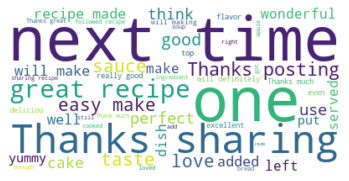

Word Cloud for Rating: 0


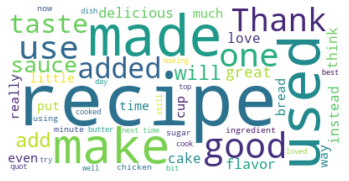

Word Cloud for Rating: 4


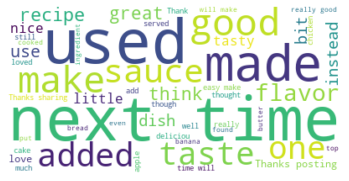

Word Cloud for Rating: 2


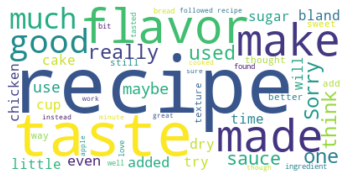

Word Cloud for Rating: 3


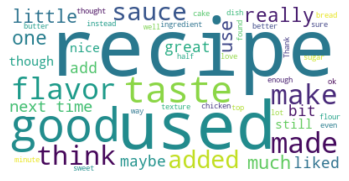

Word Cloud for Rating: 1


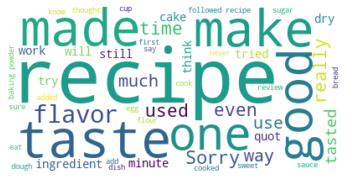

In [ ]:
create_wordcloud(dframe = recipes.iloc[0:100000,:])

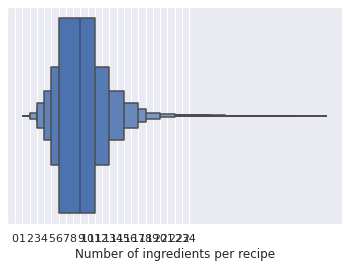

In [ ]:
import numpy as np

ax = sns.boxenplot(x = recipes['n_ingredients'],width=0.9,saturation=1)
ax.set_xticks(np.arange(0,25))
ax.set_xlabel('Number of ingredients per recipe')
plt.show()

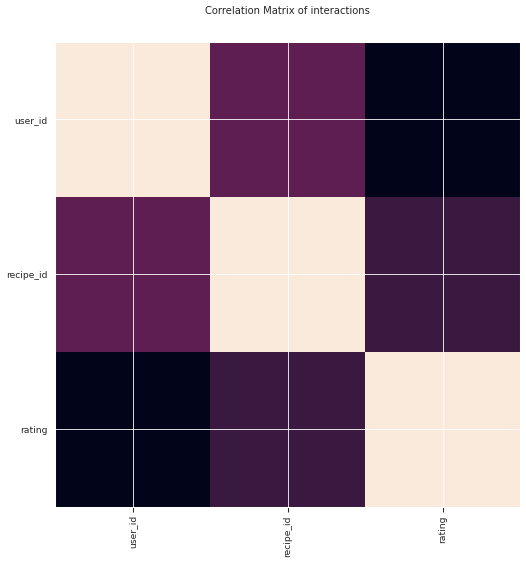

In [ ]:
def plotCorrelationMatrix(df):

    plt.figure(num=None, figsize=(10, 10), dpi=60, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.title('Correlation Matrix of interactions')
    plt.show()
rawreviews=rawreviews.dropna()
corr = rawreviews.corr()
plotCorrelationMatrix(rawreviews)

# Розподіл даних

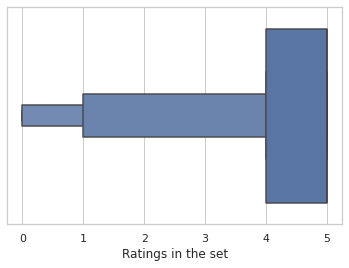

In [ ]:
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = recipes['rating'])

ax.set_xlabel('Ratings in the set')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1deff212d0>,
      dtype=object)

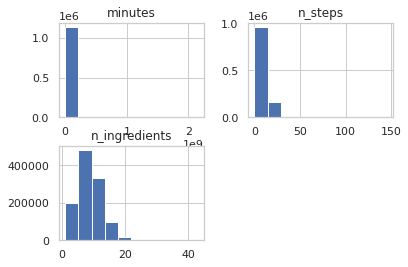

In [ ]:
recipes[['minutes', 'n_steps', 'n_ingredients']].hist()

# Найпопулярніші рецепти у датасеті